
# House price dataset exploratory analysis and pre-processing

In [349]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')

In [350]:
train = pd.read_csv('../data/train.csv')
print(train.shape)
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [351]:
def scale_feature(feature, scale_by='std'):
    #print('\n', feature.name, feature.dtype)
    if not np.issubdtype(feature.dtype, np.number):
        #print('not numeric')
        return feature
    
    if scale_by == 'std':
        return (feature - np.mean(feature)) / np.std(feature)
    elif scale_by == 'range':
        return (feature - np.mean(feature)) / max(feature) - min(feature)


In [352]:
def make_dummy_variables(df, feature_names):
    new_df = df.copy()
    dummy_variables = []
    for feature in feature_names:
        #print('\n', feature)
        for level in set(df[feature]):
            #print(level)
            if pd.isnull(level):
                #print('\t - skipped')
                continue
            dummy_var_name = f'{feature}_{level}'
            new_df[dummy_var_name] = (df[feature] == level).astype(int)  # make dummy variable feature
            dummy_variables.append(dummy_var_name)
        new_df = new_df.drop(feature, axis=1)  # drop old feature
    return new_df, dummy_variables

In [353]:
numeric_features = [x for x in train.columns if np.issubdtype(train[x], np.number)]
numeric_features.remove('SalePrice')
print(f'{len(numeric_features)} numeric features.')

37 numeric features.


In [354]:
non_numeric_features = [x for x in train.columns if x not in [*numeric_features, 'SalePrice']]
print(f'{len(non_numeric_features)} non-numeric features.')
#dict([(x, set(train[x])) for x in non_numeric_features])

43 non-numeric features.


In [355]:
df = train.apply(scale_feature, axis=0)
df, dummy_var_features = make_dummy_variables(df, non_numeric_features)
print(f'{len(dummy_var_features)} dummy variable features created.')
df.head()

252 dummy variable features created.


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_RM,MSZoning_RL,MSZoning_RH,MSZoning_FV,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_Reg,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Lvl,LandContour_Low,LandContour_Bnk,LandContour_HLS,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Inside,LotConfig_Corner,LotConfig_FR3,LotConfig_FR2,LotConfig_CulDSac,LandSlope_Mod,LandSlope_Sev,LandSlope_Gtl,Neighborhood_Timber,Neighborhood_CollgCr,Neighborhood_NWAmes,Neighborhood_Veenker,Neighborhood_Mitchel,Neighborhood_MeadowV,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_IDOTRR,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_Edwards,Neighborhood_BrDale,Neighborhood_Somerst,Neighborhood_Blmngtn,Neighborhood_Gilbert,Neighborhood_OldTown,Neighborhood_Blueste,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_NPkVill,Neighborhood_NoRidge,Neighborhood_Crawfor,Neighborhood_Sawyer,Neighborhood_SWISU,Condition1_PosA,Condition1_RRNe,Condition1_RRAe,Condition1_Artery,Condition1_Feedr,Condition1_PosN,Condition1_RRNn,Condition1_RRAn,Condition1_Norm,Condition2_PosA,Condition2_RRAe,Condition2_Artery,Condition2_Feedr,Condition2_RRNn,Condition2_PosN,Condition2_RRAn,Condition2_Norm,BldgType_Twnhs,BldgType_1Fam,BldgType_2fmCon,BldgType_TwnhsE,BldgType_Duplex,HouseStyle_SFoyer,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Unf,HouseStyle_SLvl,HouseStyle_2Story,HouseStyle_1Story,HouseStyle_2.5Fin,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Flat,RoofStyle_Mansard,RoofStyle_Hip,RoofStyle_Shed,RoofMatl_WdShake,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_CompShg,RoofMatl_WdShngl,RoofMatl_Roll,RoofMatl_ClyTile,Exterior1st_BrkFace,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_AsbShng,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_HdBoard,Exterior1st_BrkComm,Exterior1st_AsphShn,Exterior1st_Wd Sdng,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_WdShing,Exterior1st_CBlock,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_AsbShng,Exterior2nd_Other,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_HdBoard,Exterior2nd_AsphShn,Exterior2nd_Wd Sdng,Exterior2nd_ImStucc,Exterior2nd_Wd Shng,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Exterior2nd_Brk Cmn,Exterior2nd_CBlock,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_BrkCmn,MasVnrType_None,ExterQual_Fa,ExterQual_Gd,ExterQual_Ex,ExterQual_TA,ExterCond_Ex,ExterCond_Po,ExterCond_Gd,ExterCond_TA,ExterCond_Fa,Foundation_Stone,Foundation_PConc,Foundation_BrkTil,Foundation_Wood,Foundation_CBlock,Foundation_Slab,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Fa,BsmtCond_Po,BsmtCond_Gd,BsmtCond_TA,BsmtCond_Fa,BsmtExposure_No,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtFinType1_BLQ,BsmtFinType1_LwQ,BsmtFinType1_Unf,BsmtFinType1_Rec,BsmtFinType1_GLQ,BsmtFinType1_ALQ,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_Unf,BsmtFinType2_Rec,BsmtFinType2_GLQ,BsmtFinType2_ALQ,Heating_GasW,Heating_OthW,Heating_GasA,Heating_Floor,Heating_Wall,Heating_Grav,HeatingQC_Ex,HeatingQC_Po,HeatingQC_Gd,HeatingQC_TA,HeatingQC_Fa,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_SBrkr,Electrical_FuseP,Electrical_Mix,Electrical_FuseF,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Ex,KitchenQual_TA,Functional_Min1,Functional_Mod,Functional_Typ,Functional_Maj1,Functional_Sev,Functional_Maj2,Functional_Min2,FireplaceQu_Ex,FireplaceQu_Po,FireplaceQu_Gd,FireplaceQu_TA,FireplaceQu_Fa,GarageType_Basment,GarageType_2Types,GarageType_CarPort,GarageType_Detchd,GarageType_Attchd,GarageType_BuiltIn,GarageFinish_RFn,GarageFinish_Fin,GarageFinish_Unf,GarageQual_Ex,GarageQual_Po,GarageQual_Gd,GarageQ

In [356]:
print(df.shape)
only_numeric_features = len([x for x in df.columns if np.issubdtype(df[x], np.number)]) == df.shape[1]
print(f'Only numeric features in processed dataframe: {only_numeric_features}')

(1460, 290)
Only numeric features in processed dataframe: True


In [357]:
na_count = df.isna().sum()
print('missing values in columns:')
missing_value_features = list(na_count[na_count.values != 0].index)
print(na_count[missing_value_features])

missing values in columns:
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


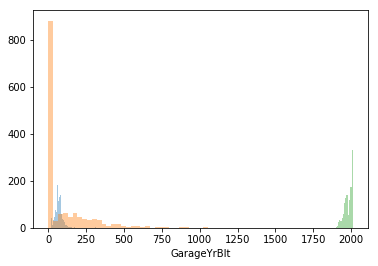

In [358]:
[sns.distplot(train[x].dropna(), kde=False) for x in missing_value_features];
train[missing_value_features].describe()

In [359]:
correlation_df = train[numeric_features].corr()[missing_value_features]  # exclude dummy variables
correlation_dict = dict([(x, correlations[x]) for x in correlations.columns])

In [360]:
# sort by absolute values of pearson correlation coefficient
correlation_dict = {k:v[v.abs().sort_values(ascending=False).index.drop(k)] for k,v in correlation_dict.items()}

top 5 correlating features for the features with missing values:

LotFrontage:
1stFlrSF       0.457181
LotArea        0.426095
GrLivArea      0.402797
TotalBsmtSF    0.392075
MSSubClass    -0.386347
Name: LotFrontage, dtype: float64




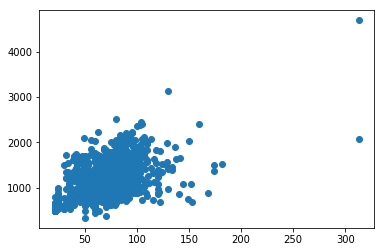

MasVnrArea:
OverallQual    0.411876
GrLivArea      0.390857
GarageArea     0.373066
GarageCars     0.364204
TotalBsmtSF    0.363936
Name: MasVnrArea, dtype: float64




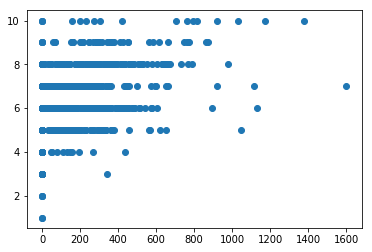

GarageYrBlt:
YearBuilt       0.825667
YearRemodAdd    0.642277
GarageCars      0.588920
GarageArea      0.564567
OverallQual     0.547766
Name: GarageYrBlt, dtype: float64




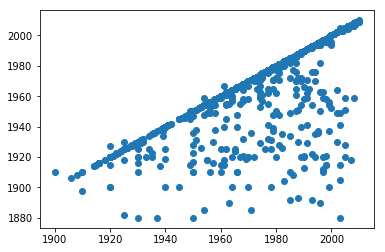

In [361]:
print('top 5 correlating features for the features with missing values:\n')
top5_corr = {k:v[:5] for k,v in correlation_dict.items()}
for k, v in top5_corr.items():
    print(f'{k}:\n{v}\n')
    print()
    #print(df[v.index[0]])
    plt.scatter(train[k], train[v.index[0]], )
    plt.show()

coefficent: [[0.45760601]]


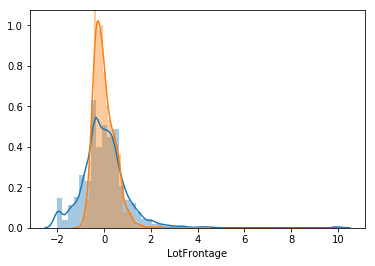

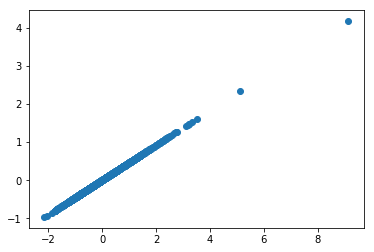

In [362]:
# Create linear regression object
lm = linear_model.LinearRegression()

fitting_data = df[['1stFlrSF', 'LotFrontage']].dropna()

# Train the model using the training sets
lm.fit(fitting_data[['1stFlrSF']].values, fitting_data[['LotFrontage']].values)
print('coefficent:', lm.coef_)

# Make predictions using the testing set
LotFrontage_prediction_all = [x for sub in lm.predict(df[['1stFlrSF']].values) for x in sub]
sns.distplot(df.LotFrontage.dropna())
sns.distplot(LotFrontage_prediction_all);
plt.show()

fitting_data_prediction = [x for sub in lm.predict(fitting_data[['1stFlrSF']].values) for x in sub]
plt.scatter(list(fitting_data['1stFlrSF']), fitting_data_prediction);

In [363]:
for row in df.iterrows():
    

RangeIndex(start=0, stop=1460, step=1)

In [364]:
df.GarageYrBlt = df.apply(lambda x: x.YearBuilt if np.isnan(x.GarageYrBlt) else x.GarageYrBlt, axis=1)
df.MasVnrArea = df.MasVnrArea.map(lambda x: np.mean(df.MasVnrArea) if np.isnan(x) else x)
#df['LotFrontage_prediction'] = LotFrontage_prediction_all
df.LotFrontage = df.apply(lambda x: LotFrontage_prediction_all[x.index] if np.isnan(x.LotFrontage) else x.LotFrontage, axis=1)
df.isnull().sum()[df.isnull().sum() != 0]

TypeError: ('list indices must be integers or slices, not Index', 'occurred at index 7')